In [1]:
import torch
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

X = digits.data
y = digits.target

X = torch.FloatTensor(X)
y = torch.LongTensor(y)

print(X.dtype)
print(y.dtype)
print(X.shape)
print(y.shape)

torch.float32
torch.int64
torch.Size([1797, 64])
torch.Size([1797])


In [3]:
from torch import nn, optim
net = nn.Linear(X.size()[1], 10)

loss_fn = nn.CrossEntropyLoss()

optimizer = optim.SGD(net.parameters(), lr=0.1)

In [4]:
from train.run_train import training_loop
training_loop(
    n_epochs = 1000,
    optimizer = optimizer,
    model = net,
    loss_fn = loss_fn,
    x_train = X,
    y_train = y,
)
# import matplotlib.pyplot as plt
# plt.plot(losses)

Epoch 1, Training loss 5.5017
Epoch 100, Training loss 0.0814
Epoch 200, Training loss 0.0333
Epoch 300, Training loss 0.0207
Epoch 400, Training loss 0.0151
Epoch 500, Training loss 0.0120
Epoch 600, Training loss 0.0101
Epoch 700, Training loss 0.0090
Epoch 800, Training loss 0.0081
Epoch 900, Training loss 0.0074
Epoch 1000, Training loss 0.0069


In [21]:
losses = []

for epoc in range(100):
    optimizer.zero_grad()
    y_pred = net(X)

    loss = loss_fn(y_pred, y)
    loss.backward()

    optimizer.step()

    losses.append(loss.item())

In [22]:
print(y_pred.dtype)
print(y.dtype)
print(y_pred.shape)
print(y.shape)
print(y_pred[0:5,:])
print(y[0:5])

torch.float32
torch.int64
torch.Size([1797, 10])
torch.Size([1797])
tensor([[ 35.7846, -23.3329,  -1.1800,  -7.5949,   4.1081,   7.2326,  -8.4689,
          -4.2222,   4.4188,  10.0446],
        [-22.2908,  33.1710,   1.7938,   4.9065,  14.0573, -16.5357, -16.9581,
          -5.7977,  14.5298,  -5.9212],
        [ -4.7593,  17.6532,  24.1476,  -4.4865,   0.9832, -30.0968,  -3.7473,
          -3.3486,  14.2879, -13.4365],
        [-12.2045,   2.3501,   6.9561,  28.2467, -11.0153,   7.7710, -18.0111,
         -13.3669,   7.1317,   7.7571],
        [  3.3546,  11.1777, -16.7987, -17.0099,  27.8404, -13.2238,  17.5664,
          -1.9079,  11.3511, -12.4842]], grad_fn=<SliceBackward0>)
tensor([0, 1, 2, 3, 4])


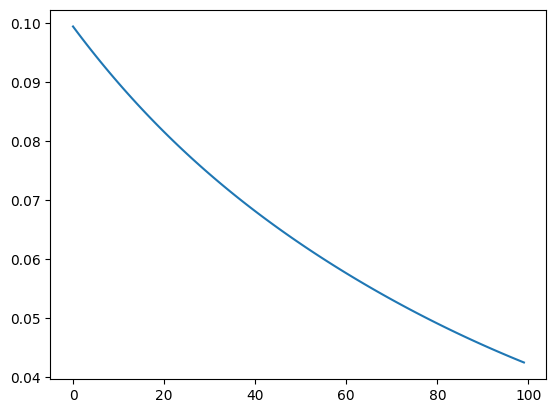

In [23]:
import matplotlib.pyplot as plt
plt.plot(losses)

In [32]:
_, y_pred = torch.max(net(X), 1)
(y_pred == y).sum().item() / len(y)

0.9515859766277128

In [34]:
for epoch in range(1, 10):
    print(epoch)

1
2
3
4
5
6
7
8
9
